In [8]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact, interact_manual


In [2]:
from google.colab import drive, files
drive.mount('/content.drive')

Mounted at /content.drive


In [3]:
!ls '/content.drive/MyDrive/UIUC/MLTP/Classification/DATA/Urban land cover'

testing.csv  training.csv


In [5]:
!jupyter nbextension enable --py widgetsnbextension


Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


# Train

In [4]:
train = pd.read_csv('/content.drive/MyDrive/UIUC/MLTP/Classification/DATA/Urban land cover/training.csv')
train_predictor = train.drop(columns=['class'])
train_predictor 

,BrdIndx,Area,Round,Bright,Compact,ShpIndx,Mean_G,Mean_R,Mean_NIR,SD_G,SD_R,SD_NIR,LW,GLCM1,Rect,GLCM2,Dens,Assym,NDVI,BordLngth,GLCM3,BrdIndx_40,Area_40,Round_40,Bright_40,Compact_40,ShpIndx_40,Mean_G_40,Mean_R_40,Mean_NIR_40,SD_G_40,SD_R_40,SD_NIR_40,LW_40,GLCM1_40,Rect_40,GLCM2_40,Dens_40,Assym_40,NDVI_40,...,Round_120,Bright_120,Compact_120,ShpIndx_120,Mean_G_120,Mean_R_120,Mean_NIR_120,SD_G_120,SD_R_120,SD_NIR_120,LW_120,GLCM1_120,Rect_120,GLCM2_120,Dens_120,Assym_120,NDVI_120,BordLngth_120,GLCM3_120,BrdIndx_140,Area_140,Round_140,Bright_140,Compact_140,ShpIndx_140,Mean_G_140,Mean_R_140,Mean_NIR_140,SD_G_140,SD_R_140,SD_NIR_140,LW_140,GLCM1_140,Rect_140,GLCM2_140,Dens_140,Assym_140,NDVI_140,BordLngth_140,GLCM3_140
0,1.27,91,0.97,231.38,1.39,1.47,207.92,241.74,244.48,21.41,20.40,18.69,2.19,0.48,0.87,6.23,1.60,0.74,-0.08,56,4219.69,1.33,97,1.12,227.19,1.32,1.42,203.95,237.23,240.38,27.63,28.36,26.18,2.00,0.50,0.85,6.29,1.67,0.70,-0.08,...,1.12,227.19,1.32,1.42,203.95,237.23,240.38,27.63,28.36,26.18,2.00,0.50,0.85,6.29,1.67,0.70,-0.08,56,3806.36,1.33,97,1.12,227.19,1.32,1.42,203.95,237.23,240.38,27.63,28.36,26.18,2.00,0.50,0.85,6.29,1.67,0.70,-0.08,56,3806.36
1,2.36,241,1.56,216.15,2.46,2.51,187.85,229.39,231.20,6.57,6.97,7.02,1.52,0.45,0.63,6.35,1.55,0.69,-0.10,156,3682.08,3.01,1188,1.45,209.44,2.25,3.54,181.91,222.46,223.95,9.82,10.37,10.51,2.97,0.63,0.65,7.16,1.43,0.83,-0.10,...,1.66,211.94,2.90,4.97,186.31,223.83,225.68,22.62,22.92,22.29,2.25,0.79,0.55,8.42,1.38,0.81,-0.09,1746,1450.14,4.57,7711,1.66,211.94,2.90,4.97,186.31,223.83,225.68,22.62,22.92,22.29,2.25,0.79,0.55,8.42,1.38,0.81,-0.09,1746,1450.14
2,2.12,266,1.47,232.18,2.07,2.21,206.54,244.22,245.79,6.16,4.93,5.53,1.14,0.52,0.78,6.19,1.88,0.19,-0.08,144,2943.35,2.32,1095,1.50,232.50,1.93,2.55,208.36,244.07,245.08,6.55,7.01,6.83,2.19,0.49,0.74,6.51,1.61,0.81,-0.08,...,1.17,222.97,1.87,2.08,201.51,232.96,234.43,15.35,15.93,15.59,2.19,0.76,0.74,7.24,1.68,0.81,-0.07,566,1094.04,1.93,4606,1.17,222.97,1.87,2.08,201.51,232.96,234.43,15.35,15.93,15.59,2.19,0.76,0.74,7.24,1.68,0.81,-0.07,566,1094.04
3,2.42,399,1.28,230.40,2.49,2.73,204.60,243.27,243.32,5.76,5.56,5.46,2.51,0.50,0.74,6.28,1.51,0.83,-0.09,218,3550.19,3.16,4009,2.28,231.57,3.48,3.47,204.77,245.17,244.76,9.55,9.35,9.34,2.27,0.63,0.62,7.04,1.32,0.84,-0.09,...,1.41,226.65,2.06,2.88,200.18,239.93,239.83,13.69,13.75,13.51,3.34,0.82,0.74,7.44,1.36,0.92,-0.09,1178,1125.38,2.41,10482,1.41,226.65,2.06,2.88,200.18,239.93,239.83,13.69,13.75,13.51,3.34,0.82,0.74,7.44,1.36,0.92,-0.09,1178,1125.38
4,2.15,944,1.73,193.18,2.28,4.10,165.98,205.55,208.00,11.46,8.90,9.77,12.26,0.71,0.59,7.36,0.63,0.99,-0.11,504,2300.41,2.15,944,1.73,193.18,2.28,4.10,165.98,205.55,208.00,11.46,8.90,9.77,12.26,0.71,0.59,7.36,0.63,0.99,-0.11,...,2.37,193.39,5.03,12.06,172.13,203.14,204.91,17.38,14.93,15.65,50.08,0.85,0.49,8.15,0.23,1.00,-0.08,6232,1146.38,3.34,16680,2.37,193.39,5.03,12.06,172.13,203.14,204.91,17.38,14.93,15.65,50.08,0.85,0.49,8.15,0.23,1.00,-0.08,6232,1146.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,1.43,39,1.41,234.03,1.54,1.60,206.36,246.05,249.69,15.48,12.95,11.83,1.67,0.26,0.75,5.47,1.40,0.60,-0.09,40,6040.96,1.53,60,1.22,221.55,1.52,1.68,194.53,232.85,237.27,22.72,25.11,24.00,1.86,0.51,0.74,5.96,1.62,0.48,-0.09,...,0.65,173.48,1.36,1.33,148.64,182.88,188.92,52.05,57.01,55.92,1.73,0.65,0.81,7.05,1.89,0.42,-0.10,66,2469.69,1.22,154,0.65,173.48,1.36,1.33,148.64,182.88,188.92,52.05,57.01,55.92,1.73,0.65,0.81,7.05,1.89,0.42,-0.10,66,2469.69
164,1.92,141,1.24,215.19,2.02,2.02,212.28,216.28,217.00,6.82,9.12,9.72,1.27,0.37,0.78,6.24,1.79,0.46,-0.01,96,3873.35,1.71,263,0.97,209.50,1.91,1.85,207.80,210.34,210.36,8.23,10.70,11.37,1.76,0.58,0.80,6.62,1.

In [11]:
# plt.figure(1, figsize=(25,25))

# for i in range(1,147):
#   plt.subplot(6,25,i+1)
#   plt.boxplot(train_predictor[train_predictor.columns[i]])
#   plt.title(train_predictor.columns[i], fontsize = 7)
#   plt.yticks(fontsize = 5)
# plt.show()

# import cufflinks as cf

# @interact
# def scatter_plot(x=list(train_predictor.select_dtypes(include = ['<M8[ns]', 'object', 'float64','bool','int']).columns), 
#                  y=list(train_predictor.select_dtypes(include = ['<M8[ns]', 'object', 'float64','bool','int']).columns)[1:],
#                 camps = list(plt.colormaps())):
    
# #     plt.figure(figsize = (25,25))
#     train_predictor.plot.scatter(x=x, y=y, colormap = camps)
#     plt.gcf().set_size_inches((15, 15))   

In [12]:
nor = preprocessing.MinMaxScaler()
train_norm = pd.DataFrame(nor.fit_transform(train_predictor), columns=train_predictor.columns)
train_norm

,BrdIndx,Area,Round,Bright,Compact,ShpIndx,Mean_G,Mean_R,Mean_NIR,SD_G,SD_R,SD_NIR,LW,GLCM1,Rect,GLCM2,Dens,Assym,NDVI,BordLngth,GLCM3,BrdIndx_40,Area_40,Round_40,Bright_40,Compact_40,ShpIndx_40,Mean_G_40,Mean_R_40,Mean_NIR_40,SD_G_40,SD_R_40,SD_NIR_40,LW_40,GLCM1_40,Rect_40,GLCM2_40,Dens_40,Assym_40,NDVI_40,...,Round_120,Bright_120,Compact_120,ShpIndx_120,Mean_G_120,Mean_R_120,Mean_NIR_120,SD_G_120,SD_R_120,SD_NIR_120,LW_120,GLCM1_120,Rect_120,GLCM2_120,Dens_120,Assym_120,NDVI_120,BordLngth_120,GLCM3_120,BrdIndx_140,Area_140,Round_140,Bright_140,Compact_140,ShpIndx_140,Mean_G_140,Mean_R_140,Mean_NIR_140,SD_G_140,SD_R_140,SD_NIR_140,LW_140,GLCM1_140,Rect_140,GLCM2_140,Dens_140,Assym_140,NDVI_140,BordLngth_140,GLCM3_140
0,0.084639,0.022198,0.331010,0.935481,0.105405,0.126543,0.821811,0.948658,0.958537,0.532585,0.501899,0.482040,0.078135,0.513158,0.833333,0.623762,0.583333,0.734694,0.373333,0.076923,0.442439,0.086387,0.008382,0.331325,0.913406,0.062745,0.076110,0.803303,0.929434,0.941129,0.465703,0.526282,0.491255,0.045188,0.493976,0.821429,0.301325,0.671958,0.680851,0.356164,...,0.168126,0.912669,0.018987,0.029197,0.816789,0.929677,0.941030,0.371188,0.425521,0.395714,0.019786,0.274194,0.824324,0.000000,0.682464,0.677419,0.394366,0.000000,1.000000,0.049699,0.000000,0.168126,0.912669,0.018987,0.029197,0.816789,0.929677,0.941030,0.371188,0.425521,0.395714,0.019786,0.274194,0.824324,0.000000,0.682464,0.677419,0.394366,0.000000,1.000000
1,0.426332,0.063305,0.536585,0.861931,0.394595,0.447531,0.728752,0.892742,0.896248,0.069847,0.109553,0.129792,0.034143,0.473684,0.525641,0.663366,0.553571,0.683673,0.346667,0.260073,0.362991,0.526178,0.149065,0.430723,0.826371,0.245098,0.524313,0.699292,0.862105,0.862999,0.081536,0.146506,0.152883,0.089019,0.650602,0.583333,0.589404,0.544974,0.819149,0.328767,...,0.262697,0.837256,0.130098,0.353102,0.730144,0.867965,0.870611,0.283386,0.330299,0.326250,0.024733,0.741935,0.418919,0.698361,0.545024,0.795699,0.380282,0.273640,0.320902,0.537651,0.227094,0.262697,0.837256,0.130098,0.353102,0.730144,0.867965,0.870611,0.283386,0.330299,0.326250,0.024733,0.741935,0.418919,0.698361,0.545024,0.795699,0.380282,0.273640,0.320902
2,0.351097,0.070156,0.505226,0.939344,0.289189,0.354938,0.815412,0.959886,0.964681,0.057063,0.049956,0.084817,0.009192,0.565789,0.717949,0.610561,0.750000,0.173469,0.373333,0.238095,0.253822,0.345550,0.137073,0.445783,0.939443,0.182353,0.315011,0.824115,0.960614,0.963479,0.011001,0.075575,0.073418,0.053773,0.481928,0.690476,0.374172,0.640212,0.797872,0.356164,...,0.176883,0.891801,0.057665,0.089416,0.804804,0.910012,0.912527,0.155976,0.207947,0.206607,0.023546,0.693548,0.675676,0.311475,0.687204,0.795699,0.408451,0.082578,0.218268,0.140060,0.134485,0.176883,0.891801,0.057665,0.089416,0.804804,0.910012,0.912527,0.155976,0.207947,0.206607,0.023546,0.693548,0.675676,0.311475,0.687204,0.795699,0.408451,0.082578,0.218268
3,0.445141,0.106605,0.439024,0.930748,0.402703,0.515432,0.806417,0.955585,0.953096,0.044590,0.068361,0.082704,0.099146,0.539474,0.666667,0.640264,0.529762,0.826531,0.360000,0.373626,0.343501,0.565445,0.512830,0.680723,0.934883,0.486275,0.509514,0.807173,0.965629,0.961957,0.075712,0.124974,0.127618,0.057388,0.650602,0.547619,0.549669,0.486772,0.829787,0.342466,...,0.218914,0.909999,0.071027,0.162409,0.798271,0.942111,0.938395,0.126884,0.169788,0.169464,0.046300,0.790323,0.675676,0.377049,0.535545,0.913978,0.380282,0.181671,0.227301,0.212349,0.309741,0.218914,0.909999,0.071027,0.162409,0.798271,0.942111,0.938395,0.126884,0.169788,0.169464,0.046300,0.790323,0.675676,0.377049,0.535545,0.913978,0.380282,0.181671,0.227301
4,0.360502,0.255961,0.595819,0.751002,0.345946,0.938272,0.627347,0.784806,0.787430,0.222326,0.165936,0.212798,0.739330,0.815789,0.474359,0.996700,0.005952,0.989796,0.333333,0.897436,0.158808,0.301047,0.117602,0.515060,0.746641,0.250980,0.642706,0.624115,0.785021,0.787151,0.116911,0.115474,0.136903,0.508812,0.746988,0.511905,0.655629,0.121693,0.989362,0.315068,...,0

In [28]:
# plt.figure(1, figsize=(25,25))

# for i in range(1,147):
#   plt.subplot(6,25,i+1)
#   plt.boxplot(train_norm[train_norm.columns[i]])
#   plt.title(train_norm.columns[i], fontsize = 7)
#   plt.yticks(fontsize = 5)
# plt.show()

In [14]:
final_train = pd.concat([train_norm, train['class']], axis = 1)
final_train

,BrdIndx,Area,Round,Bright,Compact,ShpIndx,Mean_G,Mean_R,Mean_NIR,SD_G,SD_R,SD_NIR,LW,GLCM1,Rect,GLCM2,Dens,Assym,NDVI,BordLngth,GLCM3,BrdIndx_40,Area_40,Round_40,Bright_40,Compact_40,ShpIndx_40,Mean_G_40,Mean_R_40,Mean_NIR_40,SD_G_40,SD_R_40,SD_NIR_40,LW_40,GLCM1_40,Rect_40,GLCM2_40,Dens_40,Assym_40,NDVI_40,...,Bright_120,Compact_120,ShpIndx_120,Mean_G_120,Mean_R_120,Mean_NIR_120,SD_G_120,SD_R_120,SD_NIR_120,LW_120,GLCM1_120,Rect_120,GLCM2_120,Dens_120,Assym_120,NDVI_120,BordLngth_120,GLCM3_120,BrdIndx_140,Area_140,Round_140,Bright_140,Compact_140,ShpIndx_140,Mean_G_140,Mean_R_140,Mean_NIR_140,SD_G_140,SD_R_140,SD_NIR_140,LW_140,GLCM1_140,Rect_140,GLCM2_140,Dens_140,Assym_140,NDVI_140,BordLngth_140,GLCM3_140,class
0,0.084639,0.022198,0.331010,0.935481,0.105405,0.126543,0.821811,0.948658,0.958537,0.532585,0.501899,0.482040,0.078135,0.513158,0.833333,0.623762,0.583333,0.734694,0.373333,0.076923,0.442439,0.086387,0.008382,0.331325,0.913406,0.062745,0.076110,0.803303,0.929434,0.941129,0.465703,0.526282,0.491255,0.045188,0.493976,0.821429,0.301325,0.671958,0.680851,0.356164,...,0.912669,0.018987,0.029197,0.816789,0.929677,0.941030,0.371188,0.425521,0.395714,0.019786,0.274194,0.824324,0.000000,0.682464,0.677419,0.394366,0.000000,1.000000,0.049699,0.000000,0.168126,0.912669,0.018987,0.029197,0.816789,0.929677,0.941030,0.371188,0.425521,0.395714,0.019786,0.274194,0.824324,0.000000,0.682464,0.677419,0.394366,0.000000,1.000000,car
1,0.426332,0.063305,0.536585,0.861931,0.394595,0.447531,0.728752,0.892742,0.896248,0.069847,0.109553,0.129792,0.034143,0.473684,0.525641,0.663366,0.553571,0.683673,0.346667,0.260073,0.362991,0.526178,0.149065,0.430723,0.826371,0.245098,0.524313,0.699292,0.862105,0.862999,0.081536,0.146506,0.152883,0.089019,0.650602,0.583333,0.589404,0.544974,0.819149,0.328767,...,0.837256,0.130098,0.353102,0.730144,0.867965,0.870611,0.283386,0.330299,0.326250,0.024733,0.741935,0.418919,0.698361,0.545024,0.795699,0.380282,0.273640,0.320902,0.537651,0.227094,0.262697,0.837256,0.130098,0.353102,0.730144,0.867965,0.870611,0.283386,0.330299,0.326250,0.024733,0.741935,0.418919,0.698361,0.545024,0.795699,0.380282,0.273640,0.320902,concrete
2,0.351097,0.070156,0.505226,0.939344,0.289189,0.354938,0.815412,0.959886,0.964681,0.057063,0.049956,0.084817,0.009192,0.565789,0.717949,0.610561,0.750000,0.173469,0.373333,0.238095,0.253822,0.345550,0.137073,0.445783,0.939443,0.182353,0.315011,0.824115,0.960614,0.963479,0.011001,0.075575,0.073418,0.053773,0.481928,0.690476,0.374172,0.640212,0.797872,0.356164,...,0.891801,0.057665,0.089416,0.804804,0.910012,0.912527,0.155976,0.207947,0.206607,0.023546,0.693548,0.675676,0.311475,0.687204,0.795699,0.408451,0.082578,0.218268,0.140060,0.134485,0.176883,0.891801,0.057665,0.089416,0.804804,0.910012,0.912527,0.155976,0.207947,0.206607,0.023546,0.693548,0.675676,0.311475,0.687204,0.795699,0.408451,0.082578,0.218268,concrete
3,0.445141,0.106605,0.439024,0.930748,0.402703,0.515432,0.806417,0.955585,0.953096,0.044590,0.068361,0.082704,0.099146,0.539474,0.666667,0.640264,0.529762,0.826531,0.360000,0.373626,0.343501,0.565445,0.512830,0.680723,0.934883,0.486275,0.509514,0.807173,0.965629,0.961957,0.075712,0.124974,0.127618,0.057388,0.650602,0.547619,0.549669,0.486772,0.829787,0.342466,...,0.909999,0.071027,0.162409,0.798271,0.942111,0.938395,0.126884,0.169788,0.169464,0.046300,0.790323,0.675676,0.377049,0.535545,0.913978,0.380282,0.181671,0.227301,0.212349,0.309741,0.218914,0.909999,0.071027,0.162409,0.798271,0.942111,0.938395,0.126884,0.169788,0.169464,0.046300,0.790323,0.675676,0.377049,0.535545,0.913978,0.380282,0.181671,0.227301,concrete
4,0.360502,0.255961,0.595819,0.751002,0.345946,0.938272,0.627347,0.784806,0.787430,0.222326,0.165936,0.212798,0.739330,0.815789,0.474359,0.996700,0.005952,0.989796,0.333333,0.897436,0.158808,0.301047,0.117602,0.515060,0.746641,0.250980,0.642706,0.624115,0.785021,0.787151,0.116911,0.115474,0.136903,0.508812,0.746988,0.511905,0.655629,0.121693,0.989362,0.315068,...,0.745525,0

In [27]:
import cufflinks as cf

@interact
def scatter_plot(x=list(final_train.select_dtypes(include = ['<M8[ns]', 'object', 'float64','bool','int']).columns), 
                 y=list(final_train.select_dtypes(include = ['<M8[ns]', 'object', 'float64','bool','int']).columns)[1:],
                 c = list(final_train.select_dtypes('O').columns),
                camps = list(plt.colormaps())):
    
#     plt.figure(figsize = (25,25))
    final_train.plot.scatter(x=x, y=y, colormap = camps)
    plt.gcf().set_size_inches((10, 10))   

interactive(children=(Dropdown(description='x', options=('BrdIndx', 'Area', 'Round', 'Bright', 'Compact', 'Shp…

In [26]:
import cufflinks as cf

@interact
def boxplot_plot(col=list(final_train.select_dtypes(include = ['float64','int']).columns)):
    
#     plt.figure(figsize = (25,25))
    final_train.boxplot(col)
    plt.gcf().set_size_inches((10, 10))   

interactive(children=(Dropdown(description='col', options=('BrdIndx', 'Area', 'Round', 'Bright', 'Compact', 'S…

In [25]:
import cufflinks as cf

bin_list = list(np.arange(1,101))
kde_list = [True, False]

@interact
def hist(x=list(final_train.select_dtypes(include = ['float64','int']).columns),
                 c = list(final_train.select_dtypes('O').columns), 
                  bins = bin_list,
                  kde = kde_list):
    
#     plt.figure(figsize = (25,25))
    sns.histplot(data = final_train, x = x, bins = bin_list, kde = kde, hue = 'class')
    plt.gcf().set_size_inches((10, 10))   

interactive(children=(Dropdown(description='x', options=('BrdIndx', 'Area', 'Round', 'Bright', 'Compact', 'Shp…

# Test

In [29]:
test = pd.read_csv('/content.drive/MyDrive/UIUC/MLTP/Classification/DATA/Urban land cover/testing.csv')
test_predictor = test.drop(columns=['class'])
test_predictor 

,BrdIndx,Area,Round,Bright,Compact,ShpIndx,Mean_G,Mean_R,Mean_NIR,SD_G,SD_R,SD_NIR,LW,GLCM1,Rect,GLCM2,Dens,Assym,NDVI,BordLngth,GLCM3,BrdIndx_40,Area_40,Round_40,Bright_40,Compact_40,ShpIndx_40,Mean_G_40,Mean_R_40,Mean_NIR_40,SD_G_40,SD_R_40,SD_NIR_40,LW_40,GLCM1_40,Rect_40,GLCM2_40,Dens_40,Assym_40,NDVI_40,...,Round_120,Bright_120,Compact_120,ShpIndx_120,Mean_G_120,Mean_R_120,Mean_NIR_120,SD_G_120,SD_R_120,SD_NIR_120,LW_120,GLCM1_120,Rect_120,GLCM2_120,Dens_120,Assym_120,NDVI_120,BordLngth_120,GLCM3_120,BrdIndx_140,Area_140,Round_140,Bright_140,Compact_140,ShpIndx_140,Mean_G_140,Mean_R_140,Mean_NIR_140,SD_G_140,SD_R_140,SD_NIR_140,LW_140,GLCM1_140,Rect_140,GLCM2_140,Dens_140,Assym_140,NDVI_140,BordLngth_140,GLCM3_140
0,1.32,131,0.81,222.74,1.66,2.18,192.94,235.11,240.15,11.24,11.47,11.24,8.18,0.43,0.78,6.64,0.87,0.99,-0.10,100,4322.47,1.32,131,0.81,222.74,1.66,2.18,192.94,235.11,240.15,11.24,11.47,11.24,8.18,0.43,0.78,6.64,0.87,0.99,-0.10,...,2.43,189.73,3.62,3.40,163.61,201.29,204.28,25.25,28.33,28.30,3.82,0.79,0.57,8.35,0.96,0.96,-0.10,1188,1298.99,2.93,9172,2.50,185.14,3.94,3.95,159.45,196.43,199.53,27.81,31.55,31.15,5.04,0.80,0.58,8.56,0.82,0.98,-0.10,1512,1287.52
1,1.59,864,0.94,47.56,1.41,1.87,36.82,48.78,57.09,8.15,8.02,8.36,3.05,0.43,0.85,6.75,1.81,0.73,-0.14,220,3331.33,1.08,1353,0.46,49.12,1.09,1.33,38.29,50.40,58.67,8.84,9.97,10.55,3.70,0.51,0.96,6.96,1.67,0.86,-0.14,...,0.46,49.82,1.07,1.32,38.88,51.21,59.38,10.07,11.89,12.01,3.70,0.52,0.96,7.01,1.69,0.86,-0.14,196,2659.74,1.07,1377,0.46,49.82,1.07,1.32,38.88,51.21,59.38,10.07,11.89,12.01,3.70,0.52,0.96,7.01,1.69,0.86,-0.14,196,2659.74
2,1.41,409,1.00,51.38,1.37,1.53,41.72,51.96,60.48,8.11,9.20,9.61,1.94,0.54,0.86,6.51,1.82,0.69,-0.11,124,2816.16,1.75,1094,1.91,49.05,1.84,1.98,40.06,50.07,57.02,10.54,10.81,11.55,2.57,0.49,0.75,6.93,1.49,0.88,-0.11,...,2.00,46.57,2.78,2.79,40.01,46.34,53.36,14.49,11.78,12.31,3.57,0.65,0.60,7.11,1.16,0.93,-0.07,602,1432.44,3.33,5932,1.69,55.06,2.68,3.89,59.76,48.66,56.76,30.65,18.59,18.75,3.09,0.90,0.63,8.32,1.38,0.84,0.10,1198,720.38
3,2.58,187,1.91,70.08,3.41,3.11,93.13,55.20,61.92,28.60,15.88,15.09,3.23,0.73,0.50,7.28,1.03,0.89,0.26,170,2442.01,2.86,871,2.22,90.21,3.34,3.93,117.16,72.76,80.70,42.07,27.05,27.38,5.25,0.84,0.51,8.56,0.89,0.95,0.23,...,1.65,69.80,2.20,3.22,86.22,58.03,65.15,47.93,26.70,27.67,6.33,0.89,0.70,8.56,1.10,0.96,0.20,524,891.36,2.18,1660,1.65,69.80,2.20,3.22,86.22,58.03,65.15,47.93,26.70,27.67,6.33,0.89,0.70,8.56,1.10,0.96,0.20,524,891.36
4,2.60,116,2.05,89.57,3.06,3.02,73.17,94.89,100.64,5.41,5.20,5.27,2.30,0.43,0.59,6.02,1.23,0.82,-0.13,130,4912.28,4.02,501,2.33,100.69,4.29,4.40,83.66,106.21,112.19,15.39,16.50,16.44,2.24,0.64,0.45,7.28,1.13,0.79,-0.12,...,1.05,96.24,2.00,2.56,82.84,100.31,105.55,30.51,32.60,32.05,1.01,0.83,0.75,8.62,2.08,0.08,-0.10,496,1194.76,2.53,2351,1.05,96.24,2.00,2.56,82.84,100.31,105.55,30.51,32.60,32.05,1.01,0.83,0.75,8.62,2.08,0.08,-0.10,496,1194.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,1.36,3146,0.90,244.97,1.44,1.39,229.86,252.47,252.58,7.56,4.13,3.73,1.45,0.52,0.84,6.50,2.12,0.55,-0.05,312,2397.07,1.36,4518,0.92,244.77,1.56,1.38,230.24,251.79,252.28,8.94,5.67,4.63,1.02,0.55,0.81,6.72,2.21,0.33,-0.04,...,1.71,243.92,1.60,2.02,229.70,250.71,251.35,9.84,9.05,7.58,1.51,0.63,0.84,6.85,1.96,0.47,-0.04,784,1911.96,1.97,9419,1.71,243.92,1.60,2.02,229.70,250.71,251.35,9.84,9.05,7.58,1.51,0.63,0.84,6.85,1.96,0.47,-0.04,784,1911.96
503,2.51,428,1.55,166.02,2.16,2.61,210.11,135.89,152.04,9.78,7.82,7.77,1.18,0.75,0.69,6.91,1.76,0.42,0.21,216,1872.73,2.52,894,1.60,162.24,2.26,2.53,209.46,130.28,146.99,10.87,9.86,9.48,1.14,0.75,0.70,7.15,1.78,0.24,0.23,...,1.89,155.88,3.58,3.67,198.79,127.02,141.83,17.9

In [30]:
test_norm = pd.DataFrame(nor.fit_transform(test_predictor), columns=test_predictor.columns)
test_norm

final_test = pd.concat([test_norm, test['class']], axis = 1)
final_test

,BrdIndx,Area,Round,Bright,Compact,ShpIndx,Mean_G,Mean_R,Mean_NIR,SD_G,SD_R,SD_NIR,LW,GLCM1,Rect,GLCM2,Dens,Assym,NDVI,BordLngth,GLCM3,BrdIndx_40,Area_40,Round_40,Bright_40,Compact_40,ShpIndx_40,Mean_G_40,Mean_R_40,Mean_NIR_40,SD_G_40,SD_R_40,SD_NIR_40,LW_40,GLCM1_40,Rect_40,GLCM2_40,Dens_40,Assym_40,NDVI_40,...,Bright_120,Compact_120,ShpIndx_120,Mean_G_120,Mean_R_120,Mean_NIR_120,SD_G_120,SD_R_120,SD_NIR_120,LW_120,GLCM1_120,Rect_120,GLCM2_120,Dens_120,Assym_120,NDVI_120,BordLngth_120,GLCM3_120,BrdIndx_140,Area_140,Round_140,Bright_140,Compact_140,ShpIndx_140,Mean_G_140,Mean_R_140,Mean_NIR_140,SD_G_140,SD_R_140,SD_NIR_140,LW_140,GLCM1_140,Rect_140,GLCM2_140,Dens_140,Assym_140,NDVI_140,BordLngth_140,GLCM3_140,class
0,0.090652,0.018973,0.230114,0.894393,0.093352,0.260870,0.785503,0.918535,0.939421,0.281479,0.342020,0.348041,0.331334,0.4250,0.710526,0.664093,0.227027,0.989011,0.354430,0.124611,0.629558,0.065979,0.004368,0.185644,0.893983,0.081181,0.148631,0.798493,0.918505,0.939672,0.156638,0.214496,0.209348,0.131309,0.419753,0.768421,0.471074,0.273585,0.989796,0.355263,...,0.741975,0.149629,0.273893,0.646740,0.764268,0.772535,0.344639,0.432045,0.437042,0.050438,0.766234,0.542553,0.685567,0.289216,0.958763,0.356164,0.186069,0.319166,0.282164,0.176774,0.459924,0.720402,0.167904,0.258698,0.627462,0.742202,0.750499,0.366041,0.486409,0.485602,0.063422,0.779221,0.533333,0.739691,0.267281,0.979381,0.356164,0.166780,0.315800,concrete
1,0.167139,0.146562,0.267045,0.094558,0.057992,0.189931,0.064261,0.098023,0.116754,0.168375,0.217155,0.238494,0.094601,0.4250,0.802632,0.706564,0.735135,0.703297,0.303797,0.311526,0.448608,0.016495,0.054718,0.099010,0.089143,0.011070,0.037810,0.070214,0.086853,0.107729,0.101516,0.177641,0.192551,0.049378,0.518519,0.957895,0.559229,0.650943,0.857143,0.302632,...,0.084410,0.003998,0.031469,0.068724,0.082860,0.100302,0.093481,0.154483,0.159482,0.048292,0.415584,0.957447,0.340206,0.647059,0.855670,0.301370,0.026121,0.718446,0.010234,0.025450,0.070611,0.084410,0.003998,0.024086,0.068724,0.082860,0.100302,0.088419,0.154483,0.159482,0.042386,0.415584,0.955556,0.340206,0.668203,0.855670,0.301370,0.018280,0.718446,shadow
2,0.116147,0.067363,0.284091,0.111999,0.052334,0.112128,0.086898,0.112026,0.131988,0.166911,0.259862,0.286040,0.043378,0.5625,0.815789,0.613900,0.740541,0.659341,0.341772,0.161994,0.354555,0.154639,0.044046,0.457921,0.088819,0.103321,0.122555,0.078550,0.085367,0.100165,0.140560,0.198280,0.216894,0.028713,0.493827,0.736842,0.550964,0.566038,0.877551,0.342105,...,0.069136,0.101656,0.202797,0.073961,0.060749,0.072373,0.166612,0.152625,0.164594,0.045967,0.584416,0.574468,0.365979,0.387255,0.927835,0.397260,0.091583,0.358323,0.340643,0.113876,0.305344,0.109038,0.095945,0.253345,0.165485,0.071283,0.088147,0.410485,0.267601,0.274323,0.032810,0.909091,0.588889,0.677835,0.525346,0.835052,0.630137,0.131347,0.149386,shadow
3,0.447592,0.028721,0.542614,0.197379,0.340877,0.473684,0.324402,0.126294,0.138459,0.916911,0.501629,0.494485,0.102907,0.8000,0.342105,0.911197,0.313514,0.879121,0.810127,0.233645,0.286248,0.383505,0.034858,0.534653,0.279622,0.287823,0.376793,0.441629,0.187528,0.208719,0.864722,0.597297,0.602240,0.077725,0.925926,0.484211,1.000000,0.283019,0.948980,0.789474,...,0.178315,0.068532,0.252914,0.288104,0.113825,0.127070,0.719887,0.404525,0.426308,0.095332,0.896104,0.680851,0.739691,0.357843,0.958763,0.767123,0.079007,0.199556,0.172515,0.030944,0.297710,0.178315,0.068532,0.193577,0.288104,0.113825,0.127070,0.680908,0.404525,0.426308,0.083673,0.896104,0.666667,0.739691,0.396313,0.958763,0.767123,0.055292,0.199556,tree
4,0.453258,0.016362,0.582386,0.286367,0.291372,0.453089,0.232191,0.301070,0.312466,0.068082,0.115092,0.120959,0.059991,0.4250,0.460526,0.424710,0.421622,0.802198,0.316456,0.171340,0.737237,0.622680,0.019613,0.561881,0.328203,0.404674,0.438070,0.283871,0.338136,0.353076,0.251952,0.338084,0.335930,0.022677,0.679012,0.421053,0.647383,0.396226,0.785714,0.328947,...,0.302580,0.057110,0.175

In [34]:
import cufflinks as cf

@interact
def scatter_plot(x=list(final_test.select_dtypes(include = ['<M8[ns]', 'object', 'float64','bool','int']).columns), 
                 y=list(final_test.select_dtypes(include = ['<M8[ns]', 'object', 'float64','bool','int']).columns)[1:],
                 c = list(final_test.select_dtypes('O').columns),
                camps = list(plt.colormaps())):
    
#     plt.figure(figsize = (25,25))
    final_test.plot.scatter(x=x, y=y, colormap = camps)
    plt.gcf().set_size_inches((10, 10))   

interactive(children=(Dropdown(description='x', options=('BrdIndx', 'Area', 'Round', 'Bright', 'Compact', 'Shp…

In [35]:
import cufflinks as cf

@interact
def boxplot_plot(col=list(final_test.select_dtypes(include = ['float64','int']).columns)):
    
#     plt.figure(figsize = (25,25))
    final_test.boxplot(col)
    plt.gcf().set_size_inches((10, 10))   

interactive(children=(Dropdown(description='col', options=('BrdIndx', 'Area', 'Round', 'Bright', 'Compact', 'S…

In [36]:
import cufflinks as cf

bin_list = list(np.arange(1,101))
kde_list = [True, False]

@interact
def hist(x=list(final_test.select_dtypes(include = ['float64','int']).columns),
                 c = list(final_test.select_dtypes('O').columns), 
                  bins = bin_list,
                  kde = kde_list):
    
#     plt.figure(figsize = (25,25))
    sns.histplot(data = final_test, x = x, bins = bin_list, kde = kde, hue = 'class')
    plt.gcf().set_size_inches((10, 10))   

interactive(children=(Dropdown(description='x', options=('BrdIndx', 'Area', 'Round', 'Bright', 'Compact', 'Shp…

# Train set count plot

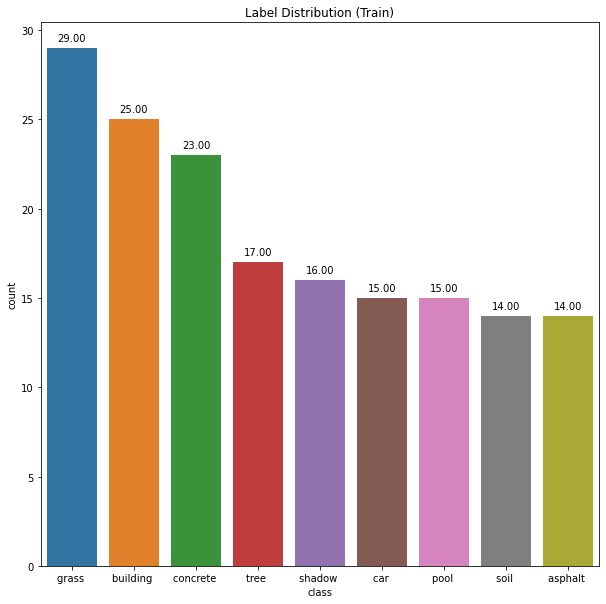

In [ ]:
plt.figure(figsize = (10,10))
splot = sns.countplot(x = 'class', data = final_train,
                      order = final_train['class'].value_counts().index)
plt.title('Label Distribution (Train)')

for p in splot.patches:
  splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

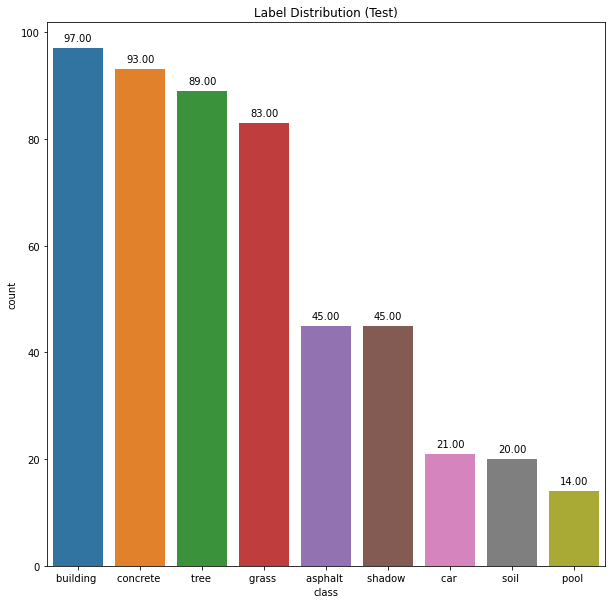

In [ ]:
plt.figure(figsize = (10,10))
splot = sns.countplot(x = 'class', data = final_test,
                      order = final_test['class'].value_counts().index)
plt.title('Label Distribution (Test)')

for p in splot.patches:
  splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

In [ ]:
print(train.shape)

(168, 148)


In [ ]:
# final_test.to_csv('final_test.csv')
# files.download('final_test.csv')